## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_md = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata = pd.merge(mouse_md, study_results, on = "Mouse ID")

# Display the data table for preview
mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
micecnt = mousedata["Mouse ID"].nunique()
micecnt

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = mousedata[mousedata.duplicated(["Mouse ID", "Timepoint"], keep=False)]
dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
alldata = mousedata.loc[mousedata["Mouse ID"].isin (dup["Mouse ID"].unique())]
alldata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = mousedata.loc[~mousedata["Mouse ID"].isin (dup["Mouse ID"].unique())]
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
clean_df = pd.DataFrame(cleandf)

In [7]:
# Checking the number of mice in the clean DataFrame.
newmicecnt = clean_df["Mouse ID"].nunique()
newmicecnt

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [9]:
regimen = clean_df["Drug Regimen"].unique()
regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
regiment = clean_df["Drug Regimen"].value_counts()
regiment

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [11]:
gbregimen = clean_df.groupby("Drug Regimen")
gbregimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [12]:
tvmean = gbregimen["Tumor Volume (mm3)"].mean()
tvmean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tvmed = gbregimen["Tumor Volume (mm3)"].median()
tvmed

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tvvar = gbregimen["Tumor Volume (mm3)"].var()
tvvar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
tvstd = gbregimen["Tumor Volume (mm3)"].std()
tvstd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
tvsem = gbregimen["Tumor Volume (mm3)"].sem()
tvsem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
tvcount = gbregimen["Tumor Volume (mm3)"].count()
tvcount

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [18]:
regimenn = np.sort(regimen)

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [19]:
groupedsum = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['count', 'mean', 'median','var','std','sem', 'max','min']})
groupedsum

Tumor Volume (mm3)                                             \
                          count       mean     median        var       std   
Drug Regimen                                                                 
Capomulin                   230  40.675741  41.557809  24.947764  4.994774   
Ceftamin                    178  52.591172  51.776157  39.290177  6.268188   
Infubinol                   178  52.884795  51.820584  43.128684  6.567243   
Ketapril                    188  55.235638  53.698743  68.553577  8.279709   
Naftisol                    186  54.331565  52.509285  66.173479  8.134708   
Placebo                     181  54.033581  52.288934  61.168083  7.821003   
Propriva                    148  52.320930  50.446266  43.852013  6.622085   
Ramicane                    228  40.216745  40.673236  23.486704  4.846308   
Stelasyn                    181  54.233149  52.431737  59.450562  7.710419   
Zoniferol                   182  53.236507  51.818479  48.533355  6.966589   

                                              
                   sem        max        min  
Drug Regimen                                  
Capomulin     0.329346  48.158209  23.343598  
Ceftamin      0.469821  68.923185  45.000000  
Infubinol     0.492236  72.226731  36.321346  
Ketapril      0.603860  78.567014  45.000000  
Naftisol      0.596466  76.668817  45.000000  
Placebo       0.581331  73.212939  45.000000  
Propriva      0.544332  72.455421  45.000000  
Ramicane      0.320955  47.622816  22.050126  
Stelasyn      0.573111  75.123690  45.000000  
Zoniferol     0.516398  73.324432  45.000000

In [20]:
barsum = pd.DataFrame(groupedsum)
barsum["Drug"] = regimenn
barsum["Count"] = tvcount
barsum["Mean"] = tvmean
barsum["Median"] = tvmed
barsum["Var"] = tvvar
barsum["Std"] = tvstd
barsum["SEM"] = tvsem
del barsum["Tumor Volume (mm3)"]
barsum

,Drug,Count,Mean,Median,Var,Std,SEM
,,,,,,,
Drug Regimen,,,,,,,
Capomulin,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar and Pie Charts

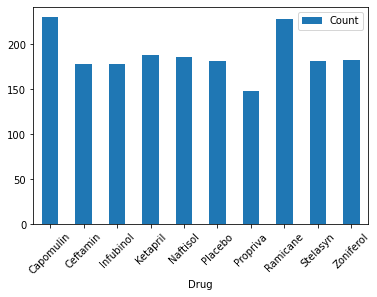

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandaplot = pd.DataFrame(barsum)
ax = pandaplot.plot.bar(x='Drug', y='Count', rot=45)

<AxesSubplot:xlabel='Drug'>

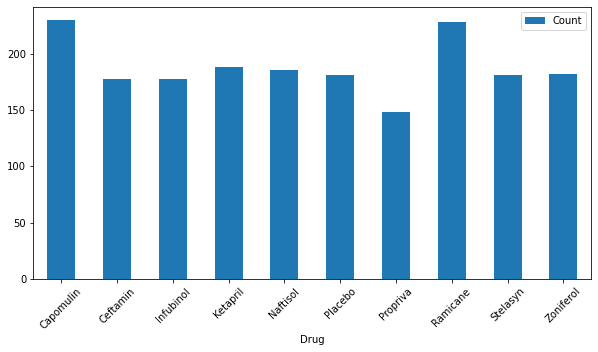

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
barsum.plot('Drug', 'Count', kind='bar',figsize=(10,5), rot=45)

In [23]:
genders = clean_df.groupby('Sex').nunique()
genders

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,123,10,24,14,10,800,5
Male,125,10,24,14,10,834,5


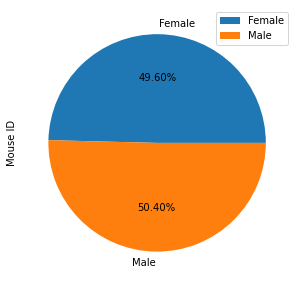

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gdf = pd.DataFrame(genders)
plot = gdf.plot.pie(y='Mouse ID', autopct='%1.2f%%', figsize=(5, 5))

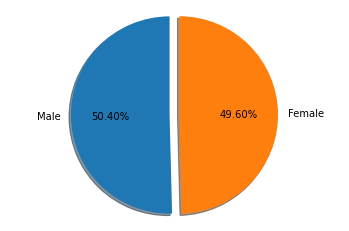

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [125,123]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [90]:
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
rami_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
cef_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [91]:
capomid = capo_df.groupby("Mouse ID")
ramimid = rami_df.groupby("Mouse ID")
infmid = inf_df.groupby("Mouse ID")
cefmid = cef_df.groupby("Mouse ID")

In [92]:
maxcapo = capomid["Timepoint"].max()
maxrami = ramimid["Timepoint"].max()
maxinf = infmid["Timepoint"].max()
maxcef = cefmid["Timepoint"].max()

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse=

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
